<a href="https://colab.research.google.com/github/Loelama36/Project_1_Computing_Errors/blob/main/Project8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Module 8: Ordinary Differential Equations**


<strong>Sunil Lama<br>
Jacob Mantooth<br>
Puran Subedi<br>
Riwaz Gyawali<br>
Instructor: Dr. Nicholas Jacob<br>
Numerical Analysis
<strong>

The function that we used in our first project is: Cos(x)

Now, let's see what happen with the differential equation:
$$   
f(x) = Cos(x)
$$
Again,
$$
\frac{dy}{dx} = cos(x)\left(1-y\right)\quad\quad y(0) = 2
$$
When we solved the above equation we got:
$$
y(x) = 1+ e^{-sinx}
$$


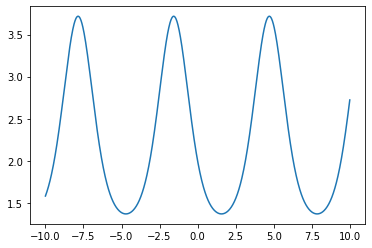

In [ ]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import pandas as pa
import math




f = lambda x,y: (np.cos(x)*(1-y))
y = lambda x: 1 + math.e**(-np.sin(x))
x = np.linspace (-10, 10, 1000)
plt.plot(x,y(x))

##Euler's Method

In Euler’s method, we can approximate the curve of the solution by the tangent in each interval at steps of h. To continue approximation, we try to find the solution for next value using the below process:
$$
y_{i+1} = y_i + f(x_i,y_i)h
$$

for h the step size, 
$$
h = x_{i+1}-x_i$$

**Now, Let's create an Euler's method function:**





In [ ]:
def eulerMethod(fx,start,interval):
  solution_list = []
  y=start
  h = interval[1]-interval[0]
  for i in interval:
    solution_list.append([y])
    y = y + f(i,y)*h
  return np.array(solution_list)

**We performed the above defined function to graph the analytic solution and numerical solution using an Euler's method.**

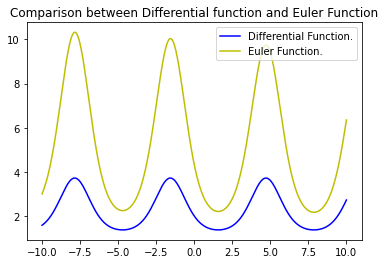

In [ ]:
plt.plot(x, y(x), 'b', label="Differential Function.")
plt.plot(x, eulerMethod(f,3,x), 'y', label="Euler Function.")
plt.title("Comparison between Differential function and Euler Function")
plt.legend(loc="upper right")

##Runge-Kutta 4th Order
Runge-Kutta methods are a class of methods which judiciously uses the information on the 'slope' at more than one point to extrapolate the solution to the future time step.
In similar fashion, we calculate the differential function for the equation: $\frac{dy}{dx}= f(x,y)$.  We will have an initial point and iterate to the next using:
$$
y_{i+1} = y_i + \frac h6 \left( k_1+2k_2+2k_3+k_4\right)
$$
where 
$$
\begin{align}
&k_1 = f(x_i,y_i)\\
&k_2 = f\left(x_i+\frac h2,y_i+\frac {k_1h}2\right)\\
&k_3 = f\left(x_i+\frac h 2,y_i +\frac{k_2 h}2\right)\\
&k_4 = f\left(x_i+h,y_i +k_3 h\right)
\end{align}
$$





**Now, Let's create the Runge-Kutta 4th Order method function:**





In [ ]:
def rungeKutta(fn, start, interval):
  solution_list = []
  y = start
  h = interval[1]-interval[0]
  for i in interval:
    solution_list.append([y])
    k1 = fn(i,y)
    k2 = fn(i+h/2,y+k1*h/2)
    k3 = fn(i+ h/2,y+k2*h/2)
    k4 = fn(i+ h , y+k3*h)
    y = y+h/6*(k1+2*k2+2*k3+k4)
  return np.array(solution_list)



**Now, Let's graph all three different solutions on the same interval.**

Text(0.5, 1.0, 'Comparison adding Runge-Kutta 4th Order ')

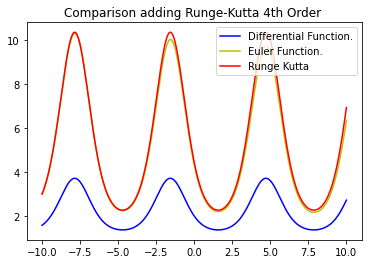

In [ ]:
plt.plot(x, y(x),'b', label="Differential Function.")
plt.plot(x, eulerMethod(f,3,x),'y', label="Euler Function.")
plt.plot(x,rungeKutta(f,3,x),'r', label="Runge Kutta")
plt.legend(loc="upper right")
plt.title("Comparison adding Runge-Kutta 4th Order ")

**Let's create the function to compute an error of each method**

In [ ]:
import plotly.graph_objects as go
import numpy as np

points = np.linspace(0, 10,10)
actual_result = [1 + math.e**(-np.sin(x)) for x in range(0,10)]
euler_result = eulerMethod(f,3,points)
runge_result = rungeKutta(f,3,points)


euler_error = []
for i in range(len(actual_result)):
    euler_error.append(((actual_result[i]-euler_result[i])/euler_array[i])*100)

runge_error = []
for i in range(len(actual_array)):
    runge_error.append(((actual_result[i]-runge_result[i])/runge_array[i])*100)

fig = go.Figure(data=[go.Table(
                header=dict(values=['Actual Values','Euler Values','Runge-Kutta Values','Euler Error in %','Runge-Kutta Error in %']),
                cells=dict(values =[actual_result,euler_result,runge_result,euler_error,runge_error]))
                     ])
fig.show()
